# Analyse

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("reports/results_28-09-25:14:43:40.csv")
#data = pd.read_csv("results/Welch-Permutations.csv", sep=';', index_col=0)
#data['Initial Sample'] = data['Initial Sample'].astype(str)
#data['index'] = data['count'].astype(str)
#data['Ratio cuboid'] = data['Ratio cuboid'].astype(str)
#data['Test'] = data['Test'].astype(str)
#data['sample ratio'] = data['sample ratio'].astype(str)


In [47]:
data.head()

,Unnamed: 0,database,N,E,label,indicators#,nodes#,avgLabelProp,time_Cardinalities,time_Indicators,time_Validation,time_Partition,partition
0,0,airports,52944,136948,Airport,24,3837,4.096648,3.140165,5.960663,0.112101,1.919783,"{'clustering': ['Country_sub_region_code', 'Co..."
1,1,airports,52944,136948,Country,23,111,17.526104,3.140165,1.518986,0.030494,0.216270,"{'clustering': ['Country_infant_mortality', 'C..."
2,2,airports,52944,136948,City,25,33635,3.897949,3.140165,9.077343,0.688464,293.287618,"{'clustering': ['Country_latitude', 'Country_r..."
3,3,recommendations,28863,166261,Actor,4,7202,0.000000,2.471103,4.274127,0.028538,4.509396,{'clustering': ['ACTED_IN__neighbor__sum_runti...
4,4,recommendations,28863,166261,Movie,8,4906,5.088219,2.471103,2.851072,0.034258,2.432753,"{'clustering': ['ACTED_IN', 'DIRECTED', 'Movie..."


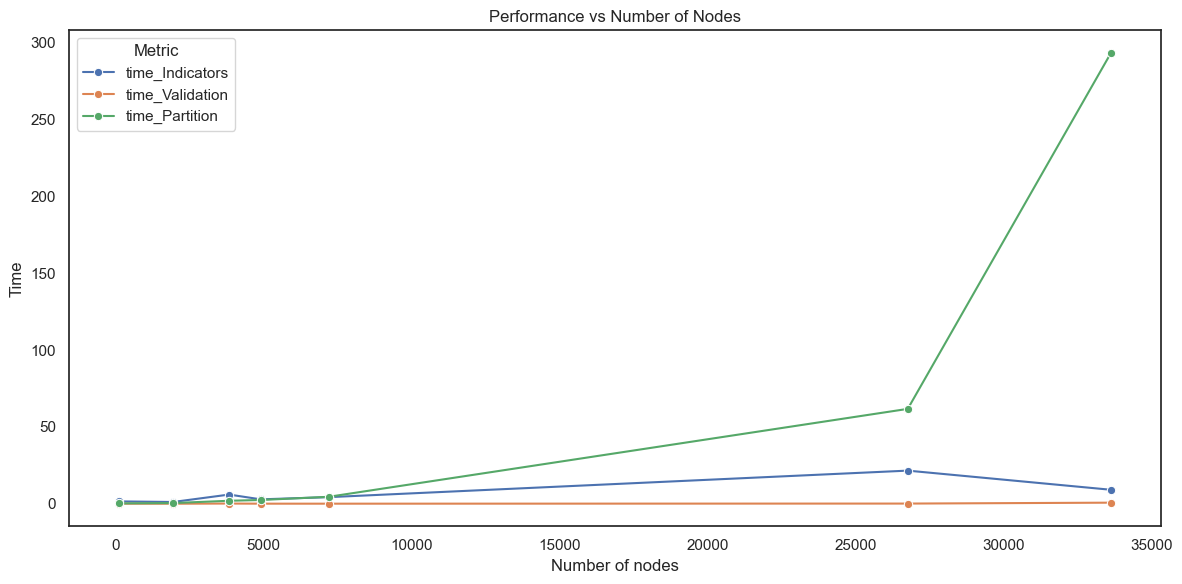

In [52]:
# Melt into long format for seaborn
long_df = data.melt(
    id_vars=['nodes#'],
    value_vars=['time_Indicators', 'time_Validation', 'time_Partition'],
    var_name='metric',
    value_name='time'
)

# Plot
sns.set_theme(style="white")
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=long_df,
    x='nodes#',
    y='time',
    hue='metric',
    marker="o"
)

plt.xlabel("Number of nodes")
plt.ylabel("Time")
plt.title("Performance vs Number of Nodes")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


In [70]:

name="figures/timeByNodes.png"
plt.savefig(name)


<Figure size 640x480 with 0 Axes>

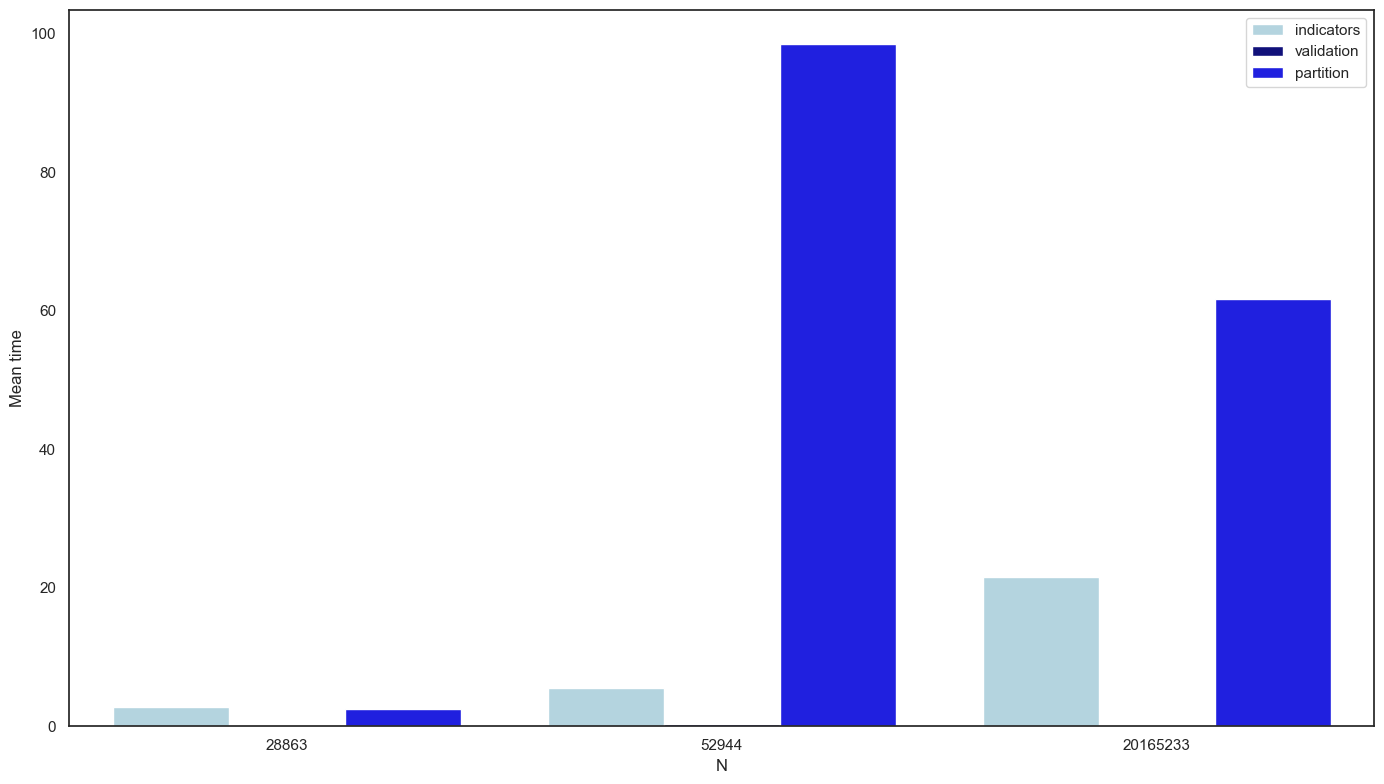

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset
dataset = pd.read_csv("reports/results_28-09-25:14:43:40.csv")

#sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 8))

# compute means once, then melt to long format
means = (data
         .groupby('N')[['time_Indicators','time_Validation','time_Partition']]
         .mean()
         .reset_index())

long_df = means.melt(id_vars='N',
                     var_name='metric',
                     value_name='time')

# nicer labels & colors
label_map = {
    'time_Indicators': 'indicators',
    'time_Validation': 'validation',
    'time_Partition': 'partition'
}
palette = {
    'time_Indicators': 'lightblue',
    'time_Validation': 'darkblue',
    'time_Partition': 'blue'
}
long_df['metric_label'] = long_df['metric'].map(label_map)

ax = sns.barplot(
    data=long_df,
    x='N', y='time',
    hue='metric',          # use the original keys to match the palette dict
    palette=palette,
    errorbar=None,         # optional: removes error bars
    dodge=True
)

# show friendly legend labels
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=[label_map[k] for k in label_map], title='')

ax.set_xlabel('N')
ax.set_ylabel('Mean time')
plt.tight_layout()
plt.show()


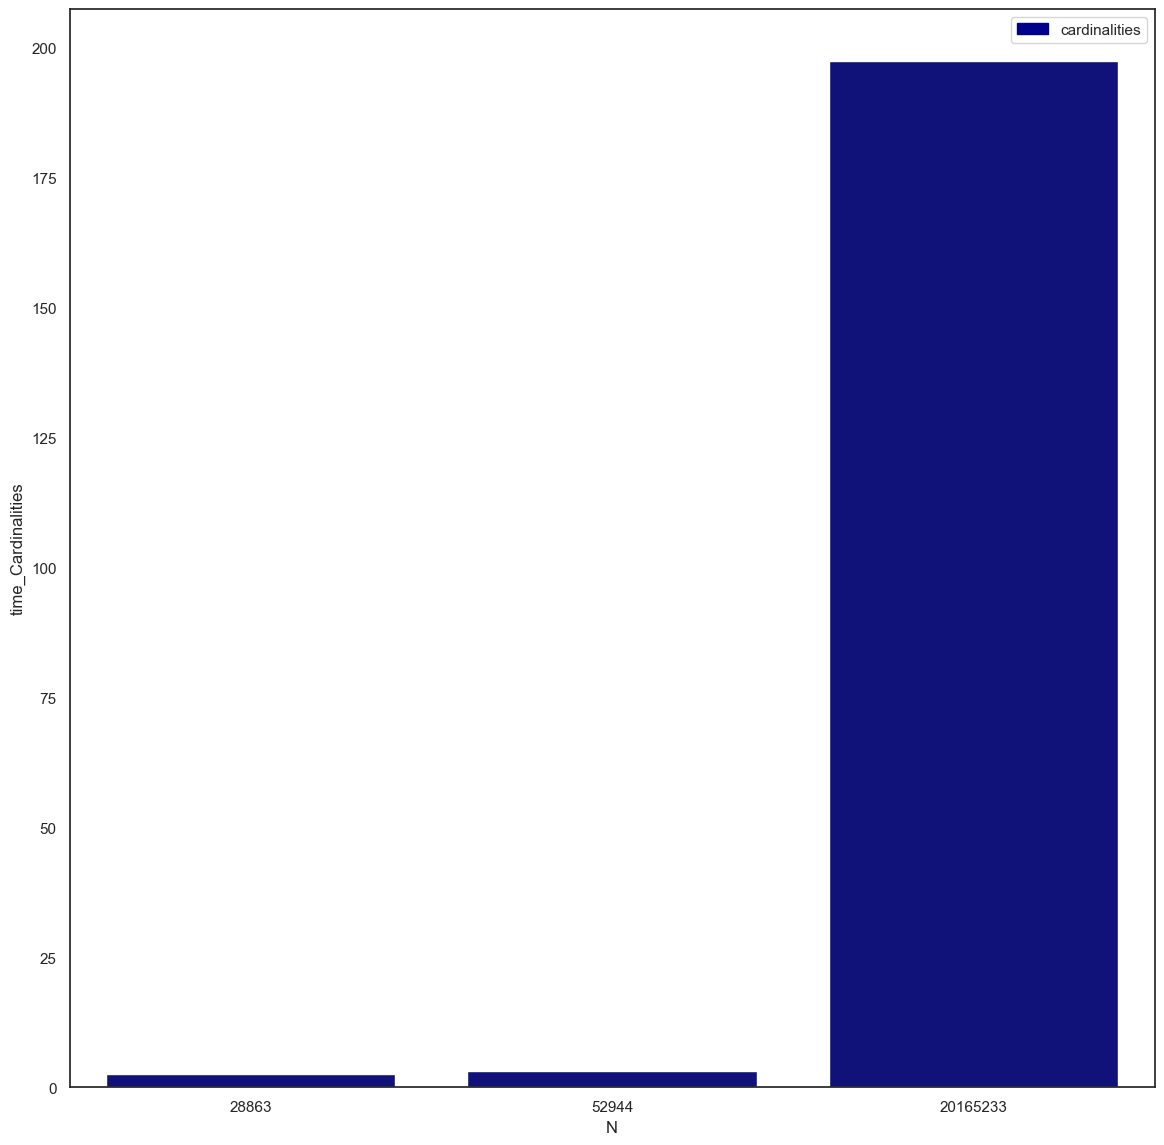

In [67]:
import matplotlib.patches as mpatches
plt.figure(figsize=(14, 14))
total1 = dataset.groupby('N')['time_Cardinalities'].mean().reset_index()
bar1 = sns.barplot(x="N", y="time_Cardinalities", data=total1, color='darkblue')
#total2 = dataset.groupby('N')['time_indicators'].mean().reset_index()
#bar2 = sns.barplot(x="N", y="time_indicators", data=total2, color='lightblue')
#total3 = dataset.groupby('N')['time_Partition'].mean().reset_index()
#bar3 = sns.barplot(x="N", y="time_Partition", data=total3, color='blue') # add legend
lbar1 = mpatches.Patch(color='darkblue', label='cardinalities')
#lbar2 = mpatches.Patch(color='lightblue', label='indicators')
#lbar3 = mpatches.Patch(color='blue', label='partition')
plt.legend(handles=[lbar1]) # show the graph
plt.show()